[[ 0.         1.         0.5       -0.5      ]
 [ 0.         0.         0.8660254  0.8660254]]
[[ 0.          0.33333333  0.16666667 -0.16666667]
 [ 0.          0.          0.28867513  0.28867513]]
[[ 2  1]
 [ 1 -1]]
[[ 0.5         0.28867513]
 [ 0.5        -0.28867513]]
[[ 1  2]
 [-1  1]]
[[ 0.          0.57735027]
 [-0.5         0.28867513]]


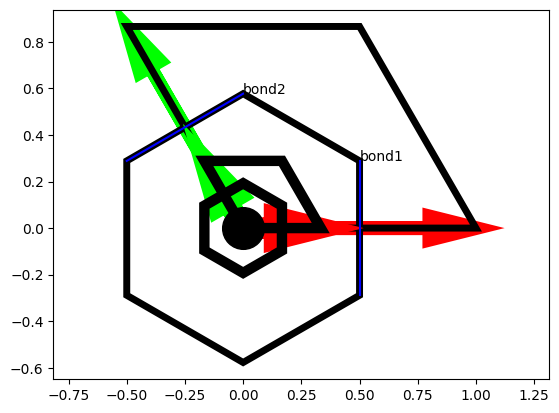

In [ ]:
import crypy as cp
import matplotlib.pyplot as plt
import importlib
importlib.reload(cp)
a1 = [1,0]
a2 = [-0.5,3**0.5/2]
pv = cp.PrimitiveVector2D(a1,a2)
pv2 = pv.get_sub_structure(3,3)
bss1 = cp.Basis2D(pv2)
pv.plot_all()
bss1.primitive_vector.plot_all()
atomgen = lambda x,y: plt.scatter(x,y,color='r')
bondgen = lambda xx,yy: plt.plot(xx,yy,color='b')

p1=(2,1)
p2=(2,1)
bss1.add_artist(atomgen,((2,1)),label='atom1')
bss1.add_artist(atomgen,((1,2)),label='atom2')
bss1.add_artist(bondgen,((2,1),(1,-1)),label='bond1')
bss1.add_artist(bondgen,((1,2),(-1,1)),label='bond2')
bss1.plot_basis()

In [144]:
bss1.basis_df

,generator,v_a12,label
0,<function <lambda> at 0x000001D434C35260>,"(0.5, 0.5)",test
1,<function <lambda> at 0x000001D434C35260>,"(1.5, 0.5)",test2


In [ ]:
bss1.

In [105]:
import pandas as pd
foo = pd.Series()
foo['atom1'] = lambda x,y: plt.scatter(x,y,color='r')
foo['atom2'] = lambda x,y: plt.scatter(x,y,color='b',marker='x')


In [129]:
foo = pd.DataFrame(columns=['generator','v_a12','label'])

In [131]:
foo.append({'generator':lambda x,y: plt.scatter(x,y,color='r'),'v_a12':(.1,.1),'label':'atom1'},ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'